In [149]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [150]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
  
# data (as pandas dataframes) 
X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets 
  
# metadata 
print(predict_students_dropout_and_academic_success.metadata) 
  
# variable information 
print(predict_students_dropout_and_academic_success.variables) 


{'uci_id': 697, 'name': "Predict Students' Dropout and Academic Success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 'area': 'Social Sc

In [151]:
import os
os.environ.pop("SSLKEYLOGFILE", None)


In [152]:
from ucimlrepo import fetch_ucirepo
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)


In [153]:
# Ver la estructura completa
predict_students_dropout_and_academic_success.data


{'ids': None,
 'features':       Marital Status  Application mode  Application order  Course  \
 0                  1                17                  5     171   
 1                  1                15                  1    9254   
 2                  1                 1                  5    9070   
 3                  1                17                  2    9773   
 4                  2                39                  1    8014   
 ...              ...               ...                ...     ...   
 4419               1                 1                  6    9773   
 4420               1                 1                  2    9773   
 4421               1                 1                  1    9500   
 4422               1                 1                  1    9147   
 4423               1                10                  1    9773   
 
       Daytime/evening attendance  Previous qualification  \
 0                              1                       1   
 1        

In [154]:
# Mostrar columnas con sus nombres visibles y entre comillas para detectar espacios
for col in predict_students_dropout_and_academic_success.data.features.columns:
    print(f"'{col}'")


'Marital Status'
'Application mode'
'Application order'
'Course'
'Daytime/evening attendance'
'Previous qualification'
'Previous qualification (grade)'
'Nacionality'
'Mother's qualification'
'Father's qualification'
'Mother's occupation'
'Father's occupation'
'Admission grade'
'Displaced'
'Educational special needs'
'Debtor'
'Tuition fees up to date'
'Gender'
'Scholarship holder'
'Age at enrollment'
'International'
'Curricular units 1st sem (credited)'
'Curricular units 1st sem (enrolled)'
'Curricular units 1st sem (evaluations)'
'Curricular units 1st sem (approved)'
'Curricular units 1st sem (grade)'
'Curricular units 1st sem (without evaluations)'
'Curricular units 2nd sem (credited)'
'Curricular units 2nd sem (enrolled)'
'Curricular units 2nd sem (evaluations)'
'Curricular units 2nd sem (approved)'
'Curricular units 2nd sem (grade)'
'Curricular units 2nd sem (without evaluations)'
'Unemployment rate'
'Inflation rate'
'GDP'


In [155]:
# ¿Existe target separado?
if predict_students_dropout_and_academic_success.data.target is not None:
    print("Target separado:")
    print(predict_students_dropout_and_academic_success.data.target.head())
else:
    print("Target no separado, buscar en features")


Target no separado, buscar en features


In [156]:
target_col = predict_students_dropout_and_academic_success.data.features.columns[-1]
print(f"Usando la última columna como target: '{target_col}'")
target = predict_students_dropout_and_academic_success.data.features[target_col]


Usando la última columna como target: 'GDP'


In [157]:
frecuencia_absoluta = target.value_counts().sort_index()
frecuencia_relativa = target.value_counts(normalize=True).sort_index()

tabla_frecuencias = pd.DataFrame({
    'Frecuencia Absoluta': frecuencia_absoluta,
    'Frecuencia Relativa': frecuencia_relativa,
    'Frecuencia Relativa (%)': frecuencia_relativa * 100
})

print(tabla_frecuencias)


       Frecuencia Absoluta  Frecuencia Relativa  Frecuencia Relativa (%)
GDP                                                                     
-4.06                  397             0.089738                 8.973779
-3.12                  533             0.120479                12.047920
-1.70                  419             0.094711                 9.471067
-0.92                  362             0.081826                 8.182640
 0.32                  571             0.129069                12.906872
 0.79                  390             0.088156                 8.815552
 1.74                  525             0.118671                11.867089
 1.79                  445             0.100588                10.058770
 2.02                  414             0.093580                 9.358047
 3.51                  368             0.083183                 8.318264


In [158]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [159]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

import pprint

In [160]:
try:
    fetch_ucirepo(name='defungi')
    # # test invalid inputs
    # fetch_ucirepo(name='heart diseaseeeee') 
    # fetch_ucirepo(id=10000)
except Exception as e:
    print(e)

"defungi" dataset (id=773) exists in the repository, but is not available for import. Please select a dataset from this list: https://archive.ics.uci.edu/datasets?skip=0&take=10&sort=desc&orderBy=NumHits&search=&Python=true


In [161]:
import json
import pandas as pd
from typing import Optional
import urllib.request
import urllib.parse
import certifi
import ssl

from ucimlrepo.dotdict import dotdict


# constants

# API endpoints
API_BASE_URL = 'https://archive.ics.uci.edu/api/dataset'
API_LIST_URL = 'https://archive.ics.uci.edu/api/datasets/list'

# base location of data csv files
DATASET_FILE_BASE_URL = 'https://archive.ics.uci.edu/static/public'

# available categories of datasets to filter by 
VALID_FILTERS = ['aim-ahead']


# custom exception for no dataset found during fetch_ucirepo
class DatasetNotFoundError(Exception):
    pass


def fetch_ucirepo(
        name: Optional[str] = None, 
        id: Optional[int] = None
    ):
    '''
    Loads a dataset from the UCI ML Repository, including the dataframes and metadata information.

    Parameters: 
        id (int): Dataset ID for UCI ML Repository
        name (str): Dataset name, or substring of name
        (Only provide id or name, not both)

    Returns:
        result (dotdict): object containing dataset metadata, dataframes, and variable info in its properties
    '''

    # check that only one argument is provided
    if name and id:
        raise ValueError('Only specify either dataset name or ID, not both')
    
    # validate types of arguments and add them to the endpoint query string
    api_url = API_BASE_URL
    if name:
        if type(name) != str:
            raise ValueError('Name must be a string')
        api_url += '?name=' + urllib.parse.quote(name)
    elif id:
        if type(id) != int:
            raise ValueError('ID must be an integer')
        api_url += '?id=' + str(id)
    else:
        # no arguments provided
        raise ValueError('Must provide a dataset name or ID')


    # fetch metadata from API
    data = None
    try:
        response = urllib.request.urlopen(api_url, context=ssl.create_default_context(cafile=certifi.where()))
        data = json.load(response)
    except (urllib.error.URLError, urllib.error.HTTPError):
        raise ConnectionError('Error connecting to server')

    # verify that dataset exists 
    if data['status'] != 200:
        error_msg = data['message'] if 'message' in data else 'Dataset not found in repository'
        raise DatasetNotFoundError(error_msg)
    

    # extract ID, name, and URL from metadata
    metadata = data['data']
    if not id:
        id = metadata['uci_id']
    elif not name:
        name = metadata['name']
    
    data_url = metadata['data_url']

    # no data URL means that the dataset cannot be imported into Python
    # i.e. it does not yet have a standardized CSV file for pandas to parse
    if not data_url:
        raise DatasetNotFoundError('"{}" dataset (id={}) exists in the repository, but is not available for import. Please select a dataset from this list: https://archive.ics.uci.edu/datasets?skip=0&take=10&sort=desc&orderBy=NumHits&search=&Python=true'.format(name, id))
    

    # parse into dataframe using pandas
    df = None
    try:
        df = pd.read_csv(data_url)
    except (urllib.error.URLError, urllib.error.HTTPError):
        raise DatasetNotFoundError('Error reading data csv file for "{}" dataset (id={}).'.format(name, id))
        
    if df.empty:
        raise DatasetNotFoundError('Error reading data csv file for "{}" dataset (id={}).'.format(name, id))


    # header line should be variable names
    headers = df.columns

    # feature information, class labels
    variables = metadata['variables']
    del metadata['variables']      # moved from metadata to a separate property
    
    # organize variables into IDs, features, or targets
    variables_by_role = {
        'ID': [],
        'Feature': [],
        'Target': [],
        'Other': []
    }
    for variable in variables:
        if variable['role'] not in variables_by_role:
            raise ValueError('Role must be one of "ID", "Feature", or "Target", or "Other"')
        variables_by_role[variable['role']].append(variable['name'])

    # extract dataframes for each variable role
    ids_df = df[variables_by_role['ID']] if len(variables_by_role['ID']) > 0 else None
    features_df = df[variables_by_role['Feature']] if len(variables_by_role['Feature']) > 0 else None
    targets_df = df[variables_by_role['Target']] if len(variables_by_role['Target']) > 0 else None

    # place all varieties of dataframes in data object
    data = {
        'ids': ids_df,
        'features': features_df,
        'targets': targets_df,
        'original': df,
        'headers': headers,
    }

    # convert variables from JSON structure to tabular structure for easier visualization
    variables = pd.DataFrame.from_records(variables)

    # alternative usage?: 
    # variables.age.role or variables.slope.description
    # print(variables) -> json-like dict with keys [name] -> details

    # make nested metadata fields accessible via dot notation
    metadata['additional_info'] = dotdict(metadata['additional_info']) if metadata['additional_info'] else None
    metadata['intro_paper'] = dotdict(metadata['intro_paper']) if metadata['intro_paper'] else None
    
    # construct result object
    result = {
        'data': dotdict(data),
        'metadata': dotdict(metadata),
        'variables': variables
    }

    # convert to dictionary with dot notation
    return dotdict(result)
    


def list_available_datasets(filter: Optional[str] = None, search: Optional[str] = None, area: Optional[str] = None):
    '''
    Prints a list of datasets that can be imported via fetch_ucirepo function

    Parameters: 
        filter (str): Optional query to filter available datasets based on a label
        search (str): Optional query to search for available datasets by name
        area (str): Optional query to filter available datasets based on subject area

    Returns:
        None
    '''

    # validate filter input
    if filter:
        if type(filter) != str:
            raise ValueError('Filter must be a string') 
        filter = filter.lower()
        
    # validate search input
    if search:
        if type(search) != str:
            raise ValueError('Search query must be a string')
        search = search.lower()
    
    # construct endpoint URL
    api_list_url = API_LIST_URL
    query_params = {}
    if filter:
        query_params['filter'] = filter
    else: 
        query_params['filter'] = 'python'       # default filter should be 'python'
    if search:
        query_params['search'] = search
    if area:
        query_params['area'] = area

    api_list_url += '?' + urllib.parse.urlencode(query_params)

    # fetch list of datasets from API
    data = None
    try:
        response  = urllib.request.urlopen(api_list_url, context=ssl.create_default_context(cafile=certifi.where()))
        resp_json = json.load(response)
    except (urllib.error.URLError, urllib.error.HTTPError):
        raise ConnectionError('Error connecting to server')

    if resp_json['status'] != 200:
        error_msg = resp_json['message'] if 'message' in resp_json else 'Internal Server Error'
        raise ValueError(resp_json['message'])
    
    data = resp_json['data']

    if len(data) == 0:
        print('No datasets found')
        return
    
    # column width for dataset name
    maxNameLen = max(max([len(dataset['name']) for dataset in data]) + 3, 15)

    # print table title
    title = 'The following {}datasets are available{}:'.format(filter + ' ' if filter else '', ' for search query "{}"'.format(search) if search else '')
    print('-' * len(title))
    print(title)
    if area:
        print('For subject area: {}'.format(area))
    print('-' * len(title))

    # print table headers
    header_str = '{:<{width}} {:<6}'.format('Dataset Name', 'ID', width=maxNameLen)
    underline_str = '{:<{width}} {:<6}'.format('------------', '--', width=maxNameLen)
    if len(data) > 0 and 'description' in data[0]:
        header_str += ' {:<100}'.format('Prediction Task')
        underline_str += ' {:<100}'.format('---------------')
    print(header_str)
    print(underline_str)
    
    # print row for each dataset
    for dataset in data:
        row_str = '{:<{width}} {:<6}'.format(dataset['name'], dataset['id'], width=maxNameLen)
        if 'description' in dataset:
            row_str += ' {:<100}'.format(dataset['description'])
        print(row_str)
    
    print()

In [162]:
from ucimlrepo.fetch import *

In [163]:
import pandas as pd

# Mostrar columnas exactas con comillas para ver espacios o caracteres raros
print("Columnas en features:")
for col in predict_students_dropout_and_academic_success.data.features.columns:
    print(f"'{col}'")

# Revisar si hay target separado
if predict_students_dropout_and_academic_success.data.target is not None:
    print("\nTarget separado (primeras filas):")
    print(predict_students_dropout_and_academic_success.data.target.head())
    target = predict_students_dropout_and_academic_success.data.target
else:
    print("\nTarget NO separado, usando última columna de features como target.")
    target_col = predict_students_dropout_and_academic_success.data.features.columns[-1]
    print(f"Columna usada como target: '{target_col}'")
    target = predict_students_dropout_and_academic_success.data.features[target_col]

# Crear tabla de frecuencias
frecuencia_absoluta = target.value_counts().sort_index()
frecuencia_relativa = target.value_counts(normalize=True).sort_index()

tabla_frecuencias = pd.DataFrame({
    'Frecuencia Absoluta': frecuencia_absoluta,
    'Frecuencia Relativa': frecuencia_relativa,
    'Frecuencia Relativa (%)': frecuencia_relativa * 100
})

print("\nTabla de frecuencias:")
print(tabla_frecuencias)


Columnas en features:
'Marital Status'
'Application mode'
'Application order'
'Course'
'Daytime/evening attendance'
'Previous qualification'
'Previous qualification (grade)'
'Nacionality'
'Mother's qualification'
'Father's qualification'
'Mother's occupation'
'Father's occupation'
'Admission grade'
'Displaced'
'Educational special needs'
'Debtor'
'Tuition fees up to date'
'Gender'
'Scholarship holder'
'Age at enrollment'
'International'
'Curricular units 1st sem (credited)'
'Curricular units 1st sem (enrolled)'
'Curricular units 1st sem (evaluations)'
'Curricular units 1st sem (approved)'
'Curricular units 1st sem (grade)'
'Curricular units 1st sem (without evaluations)'
'Curricular units 2nd sem (credited)'
'Curricular units 2nd sem (enrolled)'
'Curricular units 2nd sem (evaluations)'
'Curricular units 2nd sem (approved)'
'Curricular units 2nd sem (grade)'
'Curricular units 2nd sem (without evaluations)'
'Unemployment rate'
'Inflation rate'
'GDP'

Target NO separado, usando última col

In [164]:
# 1. Extracción del dataset desde UCI repo
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Descargar dataset con id 697
dataset = fetch_ucirepo(id=697)

# Extraer features (X) y target (y)
X = dataset.data.features
y = dataset.data.targets

# Unir en un solo DataFrame para facilitar análisis
df = pd.concat([X, y], axis=1)

# Renombrar columna target si es necesario (revisar nombre original)
target_col = y.columns[0]  # Ejemplo: 'Target'
df.rename(columns={target_col: 'Target'}, inplace=True)

# Mostrar metadata y variables para documentación
print("Metadata:\n", dataset.metadata)
print("\nVariables:\n", dataset.variables)

# Ver primeras filas
print(df.head())

# Opcional: guardar a CSV para uso posterior
df.to_csv("C:\\Users\\ABIGAIL\\Escritorio\\Master Big Data and Business Intelligence\\Proyecto TFM\\Predict students\\data\\students_data_ucimlrepo.csv", index=False)


Metadata:
 {'uci_id': 697, 'name': "Predict Students' Dropout and Academic Success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 'area':

In [165]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [166]:
dataset = fetch_ucirepo(id=697)

In [167]:
dataset = fetch_ucirepo(id=697)

X = dataset.data.features
y = dataset.data.targets

df = pd.concat([X, y], axis=1)
target_col = y.columns[0]
df.rename(columns={target_col: 'Target'}, inplace=True)

print("Metadata:")
print(dataset.metadata)
print("\nVariables:")
print(dataset.variables)

print("\nPrimeras filas del dataset:")
print(df.head())

Metadata:
{'uci_id': 697, 'name': "Predict Students' Dropout and Academic Success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 'area': 

In [168]:
df.to_csv("C:\\Users\\ABIGAIL\\Escritorio\\Master Big Data and Business Intelligence\\Proyecto TFM\\Predict students\\ucimlrepo.csv", index=False)

In [169]:
df['Target'] = df['Target'].apply(lambda x: 1 if 'dropout' in str(x).lower() else 0)

In [170]:
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
Marital Status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                  

In [171]:
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
Marital Status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                  

In [172]:
df = df.dropna()

In [173]:
bin_cols = ['Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date',
            'Gender', 'Scholarship holder', 'International']
for col in bin_cols:
    if col in df.columns:
        df[col] = df[col].astype(int)

print("\nInfo dataset tras limpieza:")
print(df.info())


Info dataset tras limpieza:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qua

In [174]:
# Ver los valores únicos en la columna 'target'
print(df['target'].unique())


KeyError: 'target'

[1 0]


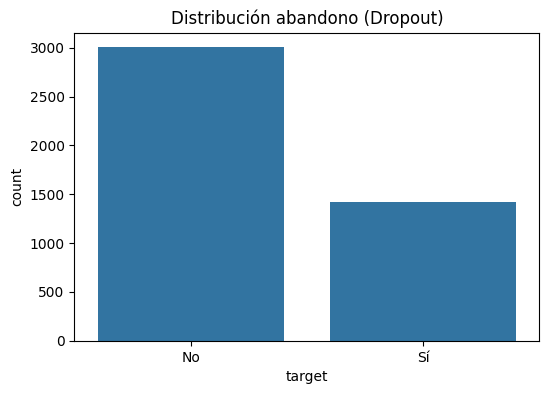

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv("data/students_data_ucimlrepo.csv")

# Asegurarse de que las columnas tengan los nombres correctos (minúsculas y sin espacios)
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Mapeo de los valores de 'target' a 0 y 1
df['target'] = df['target'].map({'Dropout': 1, 'Graduate': 0, 'Enrolled': 0})

# Verificar los valores únicos después del mapeo
print(df['target'].unique())

# Crear el gráfico de barras para la distribución de abandono (Dropout)
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Distribución abandono (Dropout)')
plt.xticks([0, 1], ['No', 'Sí'])  # Etiquetas para el eje X (0 = No abandono, 1 = Abandono)
plt.show()


In [ ]:
# Verifica los nombres de las columnas en el dataframe
print(df.columns)


Index(['marital_status', 'application_mode', 'application_order', 'course',
       'daytime/evening_attendance', 'previous_qualification',
       'previous_qualification_(grade)', 'nacionality',
       'mother's_qualification', 'father's_qualification',
       'mother's_occupation', 'father's_occupation', 'admission_grade',
       'displaced', 'educational_special_needs', 'debtor',
       'tuition_fees_up_to_date', 'gender', 'scholarship_holder',
       'age_at_enrollment', 'international',
       'curricular_units_1st_sem_(credited)',
       'curricular_units_1st_sem_(enrolled)',
       'curricular_units_1st_sem_(evaluations)',
       'curricular_units_1st_sem_(approved)',
       'curricular_units_1st_sem_(grade)',
       'curricular_units_1st_sem_(without_evaluations)',
       'curricular_units_2nd_sem_(credited)',
       'curricular_units_2nd_sem_(enrolled)',
       'curricular_units_2nd_sem_(evaluations)',
       'curricular_units_2nd_sem_(approved)',
       'curricular_units_2nd_s

In [ ]:
if 'age at enrollment' in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='target', y='age at enrollment', data=df)
    plt.title('Edad al matricularse según abandono')
    plt.xticks([0, 1], ['No', 'Sí'])
    plt.show()
print("Metadata:")
print(dataset.metadata) 

Metadata:
{'uci_id': 697, 'name': "Predict Students' Dropout and Academic Success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 'area': 

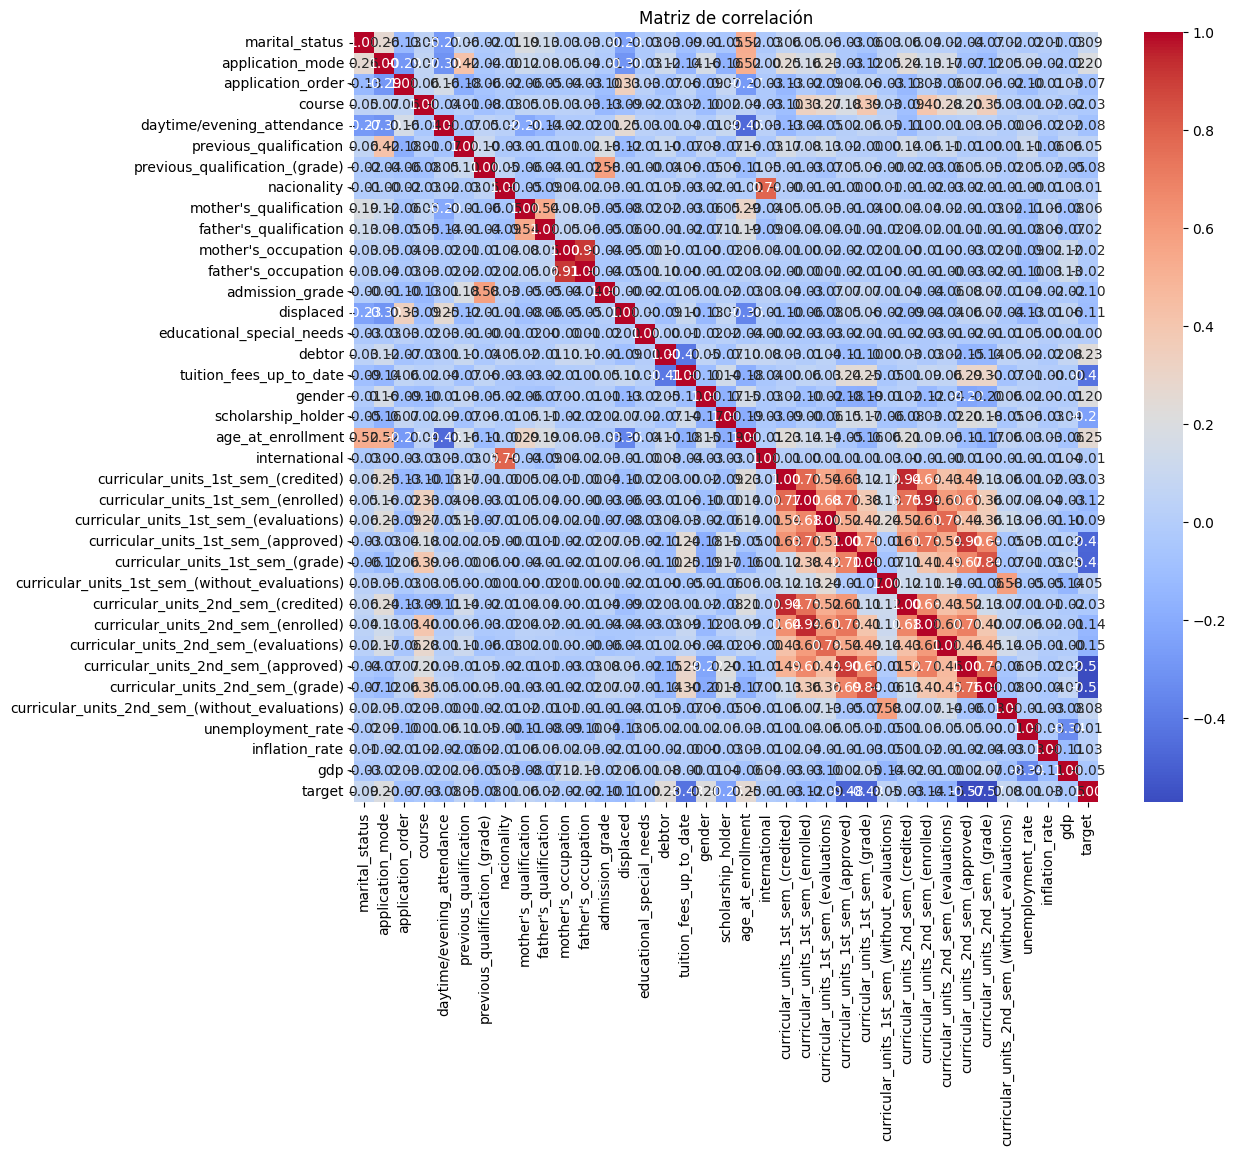

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()


In [ ]:
streamlit run app.py


SyntaxError: invalid syntax (507122745.py, line 1)

In [ ]:
# Verifica las columnas en el dataframe
print(df.columns)


Index(['marital_status', 'application_mode', 'application_order', 'course',
       'daytime/evening_attendance', 'previous_qualification',
       'previous_qualification_(grade)', 'nacionality',
       'mother's_qualification', 'father's_qualification',
       'mother's_occupation', 'father's_occupation', 'admission_grade',
       'displaced', 'educational_special_needs', 'debtor',
       'tuition_fees_up_to_date', 'gender', 'scholarship_holder',
       'age_at_enrollment', 'international',
       'curricular_units_1st_sem_(credited)',
       'curricular_units_1st_sem_(enrolled)',
       'curricular_units_1st_sem_(evaluations)',
       'curricular_units_1st_sem_(approved)',
       'curricular_units_1st_sem_(grade)',
       'curricular_units_1st_sem_(without_evaluations)',
       'curricular_units_2nd_sem_(credited)',
       'curricular_units_2nd_sem_(enrolled)',
       'curricular_units_2nd_sem_(evaluations)',
       'curricular_units_2nd_sem_(approved)',
       'curricular_units_2nd_s

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el gráfico de caja para 'Edad al matricularse' según 'target'
if 'age_at_enrollment' in df.columns and 'target' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='target', y='age_at_enrollment', data=df)
    plt.title('Edad al matricularse según abandono')
    plt.xticks([0, 1], ['No', 'Sí'])  # Etiquetas de 0: No abandono, 1: Abandono
    plt.show()
else:
    print("Las columnas 'age_at_enrollment' o 'target' no están en el dataframe.")


In [176]:
import pandas as pd
 
# Vista general del dataset
print(X.head())
print(y.head())
 
# Dimensiones del dataset
print("Dimensiones X:", X.shape)
print("Dimensiones y:", y.shape)
 
# Información estructural
print(X.info())
 
# Estadísticas descriptivas
print(X.describe())
 
# Valores faltantes
print(X.isnull().sum())
 
# Distribución de la variable objetivo
print(y.value_counts())
 
# Correlación entre variables numéricas
correlation_matrix = X.corr()
print(correlation_matrix)

   Marital Status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0     

In [179]:
from ucimlrepo import fetch_ucirepo

# Asegúrate de que `dataset` se carga correctamente
dataset = fetch_ucirepo(id=697)

# Verifica que `dataset` no sea None
if dataset is None:
    print("Error: No se pudo cargar el dataset.")
else:
    print("Dataset cargado correctamente.")

# Accede a las características (X) y al objetivo (y)
X = dataset.data.features
y = dataset.data.targets

# Ahora puedes continuar con la manipulación de X y y
print(X.head())
print(y.head())


Dataset cargado correctamente.
   Marital Status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2      

In [ ]:
import pandas as pd

# Cargar el dataset desde un archivo CSV"C:\\Users\\ABIGAIL\\Escritorio\\Master Big Data and Business Intelligence\\Proyecto TFM\\Predict students\\Data\\students_data_ucimlrepo.csv"
dataset = pd.read_csv()

# Verifica que el dataset esté correctamente cargado
print(dataset.head())  # Ver las primeras filas del dataset

# Asumiendo que 'target' es la columna de la variable objetivo, dividimos los datos
X = dataset.drop(columns=['Target'])  # Características (sin la columna 'target')
y = dataset['Target']  # Variable objetivo

# Verifica que X e y se asignen correctamente
print(X.head())
print(y.head())


   Marital Status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0     

In [185]:
# Verifica el tipo de 'dataset'
print(type(dataset))


<class 'pandas.core.frame.DataFrame'>


In [186]:
# Media de todas las columnas numéricas en X
mean_values = X.mean()
print("Media de cada columna:")
print(mean_values)


Media de cada columna:
Marital Status                                       1.178571
Application mode                                    18.669078
Application order                                    1.727848
Course                                            8856.642631
Daytime/evening attendance                           0.890823
Previous qualification                               4.577758
Previous qualification (grade)                     132.613314
Nacionality                                          1.873192
Mother's qualification                              19.561935
Father's qualification                              22.275316
Mother's occupation                                 10.960895
Father's occupation                                 11.032324
Admission grade                                    126.978119
Displaced                                            0.548373
Educational special needs                            0.011528
Debtor                                         

In [187]:
# Mediana de todas las columnas numéricas en X
median_values = X.median()
print("\nMediana de cada columna:")
print(median_values)



Mediana de cada columna:
Marital Status                                       1.000000
Application mode                                    17.000000
Application order                                    1.000000
Course                                            9238.000000
Daytime/evening attendance                           1.000000
Previous qualification                               1.000000
Previous qualification (grade)                     133.100000
Nacionality                                          1.000000
Mother's qualification                              19.000000
Father's qualification                              19.000000
Mother's occupation                                  5.000000
Father's occupation                                  7.000000
Admission grade                                    126.100000
Displaced                                            1.000000
Educational special needs                            0.000000
Debtor                                      

In [188]:
# Moda de todas las columnas numéricas en X
mode_values = X.mode().iloc[0]  # mode() devuelve una DataFrame, así que seleccionamos la primera fila
print("\nModa de cada columna:")
print(mode_values)



Moda de cada columna:
Marital Status                                       1.00
Application mode                                     1.00
Application order                                    1.00
Course                                            9500.00
Daytime/evening attendance                           1.00
Previous qualification                               1.00
Previous qualification (grade)                     133.10
Nacionality                                          1.00
Mother's qualification                               1.00
Father's qualification                              37.00
Mother's occupation                                  9.00
Father's occupation                                  9.00
Admission grade                                    130.00
Displaced                                            1.00
Educational special needs                            0.00
Debtor                                               0.00
Tuition fees up to date                          

In [190]:
import pandas as pd

# Cargar el dataset (ajusta la ruta al archivo si es necesario)
df = pd.read_csv("C:\\Users\\ABIGAIL\\Escritorio\\Master Big Data and Business Intelligence\\Proyecto TFM\\Predict students\\Data\\students_data_ucimlrepo.csv")  # Usa pd.read_excel() si es un archivo Excel


In [191]:
# Seleccionar solo las columnas numéricas del DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64'])


In [192]:
# Calcular la media de las columnas numéricas
mean_values = numeric_columns.mean()
print("Media de cada columna:")
print(mean_values)

# Calcular la mediana de las columnas numéricas
median_values = numeric_columns.median()
print("\nMediana de cada columna:")
print(median_values)

# Calcular la moda de las columnas numéricas
# La moda puede ser múltiple, así que seleccionamos la primera moda (si hay más de una)
mode_values = numeric_columns.mode().iloc[0]
print("\nModa de cada columna:")
print(mode_values)


Media de cada columna:
Marital Status                                       1.178571
Application mode                                    18.669078
Application order                                    1.727848
Course                                            8856.642631
Daytime/evening attendance                           0.890823
Previous qualification                               4.577758
Previous qualification (grade)                     132.613314
Nacionality                                          1.873192
Mother's qualification                              19.561935
Father's qualification                              22.275316
Mother's occupation                                 10.960895
Father's occupation                                 11.032324
Admission grade                                    126.978119
Displaced                                            0.548373
Educational special needs                            0.011528
Debtor                                         

In [194]:
import pandas as pd

# Cargar el dataset (ajusta la ruta)
df = pd.read_csv('C:\\Users\\ABIGAIL\\Escritorio\\Master Big Data and Business Intelligence\\Proyecto TFM\\Predict students\\Data\\students_data_ucimlrepo.csv') 
# Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calcular la media
mean_values = numeric_columns.mean()
print("Media de cada columna:")
print(mean_values)

# Calcular la mediana
median_values = numeric_columns.median()
print("\nMediana de cada columna:")
print(median_values)

# Calcular la moda
mode_values = numeric_columns.mode().iloc[0]
print("\nModa de cada columna:")
print(mode_values)


Media de cada columna:
Marital Status                                       1.178571
Application mode                                    18.669078
Application order                                    1.727848
Course                                            8856.642631
Daytime/evening attendance                           0.890823
Previous qualification                               4.577758
Previous qualification (grade)                     132.613314
Nacionality                                          1.873192
Mother's qualification                              19.561935
Father's qualification                              22.275316
Mother's occupation                                 10.960895
Father's occupation                                 11.032324
Admission grade                                    126.978119
Displaced                                            0.548373
Educational special needs                            0.011528
Debtor                                         

In [195]:
with pd.ExcelWriter('estadisticas.xlsx') as writer:
    mean_values.to_frame('Media').to_excel(writer, sheet_name='Estadísticas', index=True)
    median_values.to_frame('Mediana').to_excel(writer, sheet_name='Estadísticas', index=True)
    mode_values.to_frame('Moda').to_excel(writer, sheet_name='Estadísticas', index=True)


In [197]:
import pandas as pd

# Cargar el dataset (ajusta la ruta según corresponda)
df = pd.read_csv('C:\\Users\\ABIGAIL\\Escritorio\\Master Big Data and Business Intelligence\\Proyecto TFM\\Predict students\\Data\\students_data_ucimlrepo.csv')  # Cambia la ruta del archivo

# Seleccionar solo las columnas numéricas del dataframe
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calcular la media, mediana y moda
mean_values = numeric_columns.mean()
median_values = numeric_columns.median()
mode_values = numeric_columns.mode().iloc[0]  # Selecciona la primera moda

# Crear una tabla con los resultados
summary_table = pd.DataFrame({
    'Media': mean_values,
    'Mediana': median_values,
    'Moda': mode_values
})

# Mostrar la tabla
print(summary_table)

# Guardar


                                                      Media      Mediana  \
Marital Status                                     1.178571     1.000000   
Application mode                                  18.669078    17.000000   
Application order                                  1.727848     1.000000   
Course                                          8856.642631  9238.000000   
Daytime/evening attendance                         0.890823     1.000000   
Previous qualification                             4.577758     1.000000   
Previous qualification (grade)                   132.613314   133.100000   
Nacionality                                        1.873192     1.000000   
Mother's qualification                            19.561935    19.000000   
Father's qualification                            22.275316    19.000000   
Mother's occupation                               10.960895     5.000000   
Father's occupation                               11.032324     7.000000   
Admission gr

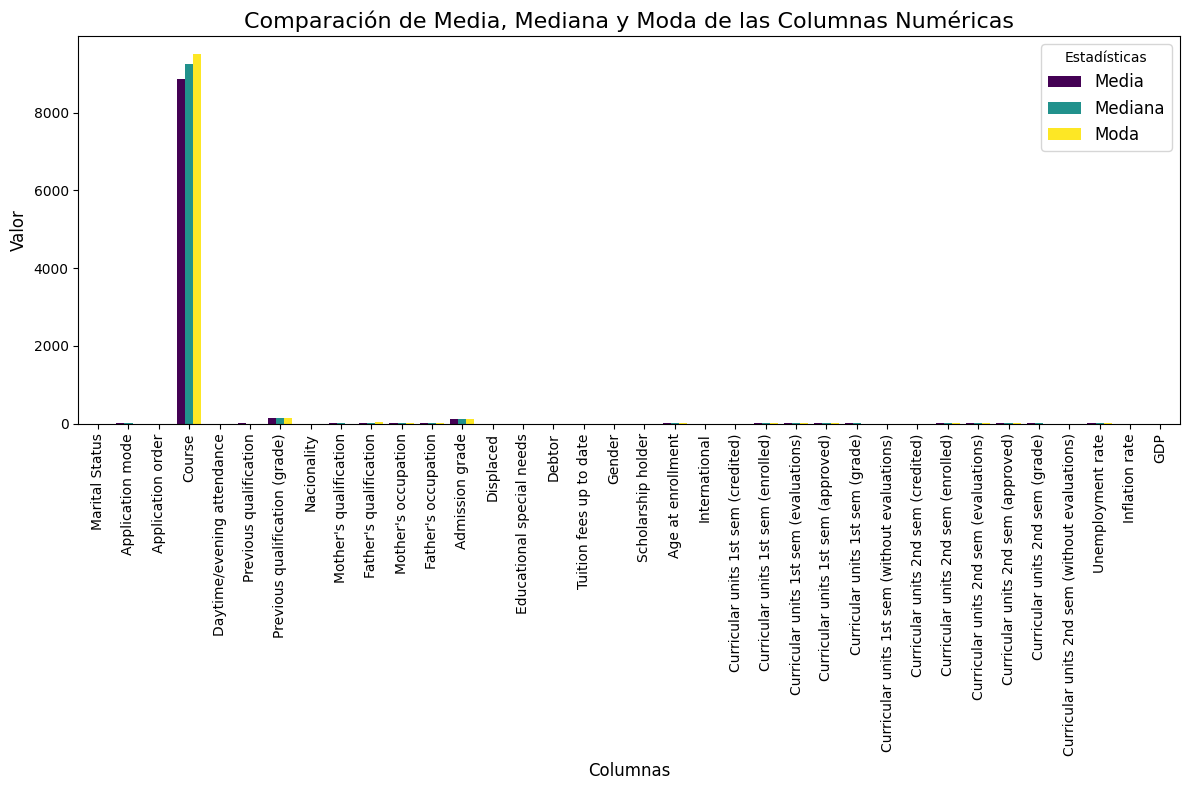

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset (ajusta la ruta según corresponda)
df = pd.read_csv('C:\\Users\\ABIGAIL\\Escritorio\\Master Big Data and Business Intelligence\\Proyecto TFM\\Predict students\\Data\\students_data_ucimlrepo.csv')  
# Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calcular la media, mediana y moda
mean_values = numeric_columns.mean()
median_values = numeric_columns.median()
mode_values = numeric_columns.mode().iloc[0]  # Selecciona la primera moda

# Crear un DataFrame con los resultados
summary_table = pd.DataFrame({
    'Media': mean_values,
    'Mediana': median_values,
    'Moda': mode_values
})

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
summary_table.plot(kind='bar', width=0.8, colormap='viridis', ax=plt.gca())

# Ajustes del gráfico
plt.title('Comparación de Media, Mediana y Moda de las Columnas Numéricas', fontsize=16)
plt.xlabel('Columnas', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x
plt.legend(title='Estadísticas', fontsize=12)
plt.tight_layout()  # Ajusta el gráfico para que no se recorten las etiquetas

# Mostrar el gráfico
plt.show()


In [200]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset (ajusta la ruta según corresponda)
df = pd.read_csv('C:\\Users\\ABIGAIL\\Escritorio\\Master Big Data and Business Intelligence\\Proyecto TFM\\Predict students\\Data\\students_data_ucimlrepo.csv') # Cambia la ruta del archivo

# Filtrar solo las columnas sin valores nulos
df_no_null = df.dropna(axis=1, how='any')  # Elimina columnas con cualquier valor nulo

# Seleccionar solo las columnas numéricas
numeric_columns = df_no_null.select_dtypes(include=['float64', 'int64'])

# Calcular la media, mediana y moda de las columnas numéricas
mean_values = numeric_columns.mean()
median_values = numeric_columns.median()
mode_values = numeric_columns.mode().iloc[0]  # Selecciona la primera moda

# Crear una tabla con los resultados
summary_table = pd.DataFrame({
    'Media': mean_values,
    'Mediana': median_values,
    'Moda': mode_values
})

# Mostrar la tabla
print("Tabla de Estadísticas Descriptivas (solo columnas con datos):")
print(summary_table)

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
summary_table.plot(kind='bar', width=0.8, colormap='viridis', ax=plt.gca())

# Ajustes del gráfico
plt.title('Comparación de Media, Mediana y Moda de las Columnas Numéricas (Sin Valores Nulos)', fontsize=16)
plt.xlabel('Columnas', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X
plt.legend(title='Estadísticas', fontsize=12)
plt.tight_layout()  # Ajusta el gráfico para que no se recorten las etiquetas

# Mostrar el gráfico
plt.show()


Tabla de Estadísticas Descriptivas (solo columnas con datos):
                                                      Media      Mediana  \
Marital Status                                     1.178571     1.000000   
Application mode                                  18.669078    17.000000   
Application order                                  1.727848     1.000000   
Course                                          8856.642631  9238.000000   
Daytime/evening attendance                         0.890823     1.000000   
Previous qualification                             4.577758     1.000000   
Previous qualification (grade)                   132.613314   133.100000   
Nacionality                                        1.873192     1.000000   
Mother's qualification                            19.561935    19.000000   
Father's qualification                            22.275316    19.000000   
Mother's occupation                               10.960895     5.000000   
Father's occupation       

In [ ]:
streamlit run app/app.py